In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
from scipy.optimize import root_scalar

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import kinematics
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

import curvature as kurvature
from skimage import measure

In [2]:
os.getenv('ENDPOINT_URL') 

tbl_file = 's3://llc/Tables/test_noise_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

# for later use
llc_table['DT_abs'] = llc_table.Tmax - llc_table.Tmin

Read main table: s3://llc/Tables/test_noise_modis2012.parquet


# Pick cutout

In [3]:
low_LL = llc_table.LL < -1000
temp_floor = (llc_table.T90 - llc_table.T10) > 3.1
temp_ceiling = (llc_table.T90 - llc_table.T10) < 3.2

sub_tbl = llc_table[low_LL& temp_floor & temp_ceiling ]

<AxesSubplot:>

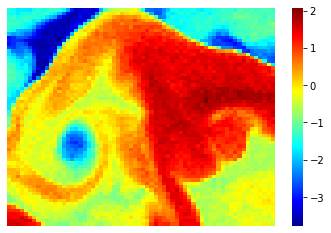

In [4]:
cutout1 = sub_tbl.iloc[1]

img1 = llc_io.grab_image(cutout1)

ulmo_plotting.show_image(img1)

In [29]:
cutout1.filename

's3://llc/ThetaUVSalt/LLC4320_2012-03-30T12_00_00.nc'

# Matplotlib Contour Plot

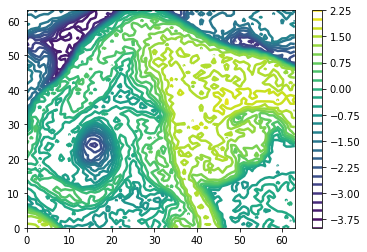

In [6]:
#Find number of contour levels to draw
lvls1 = int(cutout1.DT_abs // 0.2) + 1

#Contour map
plt.contour(img1, levels = lvls1, linewidths = 2.5)
plt.colorbar()
plt.show()

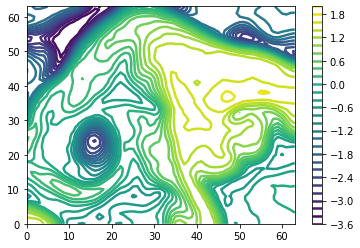

In [7]:
#chosen by appearance, sigma = 1 looks good 
img_g1 = gaussian_filter(img1, sigma = 1)

#Contour map
cs2 = plt.contour(img_g1, levels = lvls1, linewidths = 2.5)
plt.colorbar()
plt.show()

# Order of Segments

#### Top right to bottom left

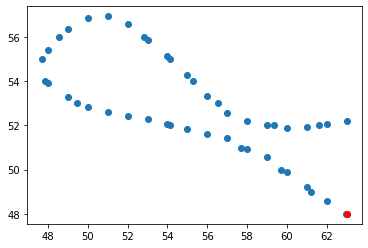

In [8]:
plt.scatter(cs2.allsegs[8][0][:, 0], cs2.allsegs[8][0][:, 1])
plt.scatter(cs2.allsegs[8][0][0, 0], cs2.allsegs[8][0][0, 1], c = 'r')

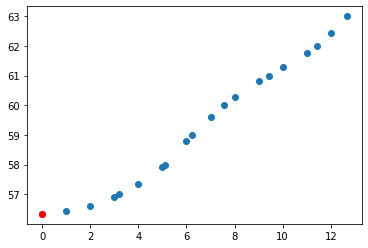

In [9]:
plt.scatter(cs2.allsegs[8][1][:, 0], cs2.allsegs[8][1][:, 1])
plt.scatter(cs2.allsegs[8][1][0, 0], cs2.allsegs[8][1][0, 1], c = 'r')

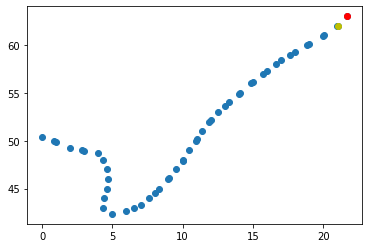

In [10]:
plt.scatter(cs2.allsegs[8][2][:, 0], cs2.allsegs[8][2][:, 1])
plt.scatter(cs2.allsegs[8][2][0, 0], cs2.allsegs[8][2][0, 1], c = 'r')
plt.scatter(cs2.allsegs[8][2][1, 0], cs2.allsegs[8][2][1, 1], c = 'y')

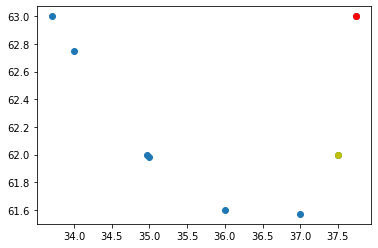

In [11]:
plt.scatter(cs2.allsegs[8][3][:, 0], cs2.allsegs[8][3][:, 1])
plt.scatter(cs2.allsegs[8][3][0, 0], cs2.allsegs[8][3][0, 1], c = 'r')
plt.scatter(cs2.allsegs[8][3][1, 0], cs2.allsegs[8][3][1, 1], c = 'y')

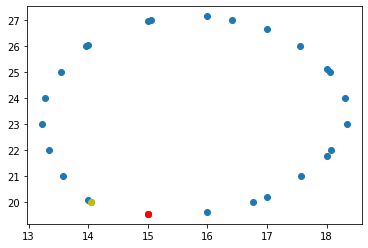

In [12]:
plt.scatter(cs2.allsegs[8][4][:, 0], cs2.allsegs[8][4][:, 1])
plt.scatter(cs2.allsegs[8][4][0, 0], cs2.allsegs[8][4][0, 1], c = 'r')
plt.scatter(cs2.allsegs[8][4][1, 0], cs2.allsegs[8][4][1, 1], c = 'y')

#### Next batch

In [13]:
len(cs2.allsegs[9])

5

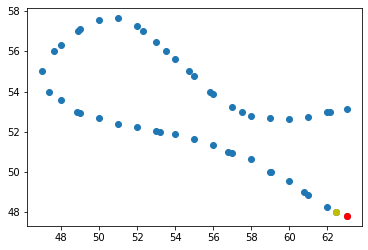

In [14]:
plt.scatter(cs2.allsegs[9][0][:, 0], cs2.allsegs[9][0][:, 1])
plt.scatter(cs2.allsegs[9][0][0, 0], cs2.allsegs[9][0][0, 1], c = 'r')
plt.scatter(cs2.allsegs[9][0][1, 0], cs2.allsegs[9][0][1, 1], c = 'y')

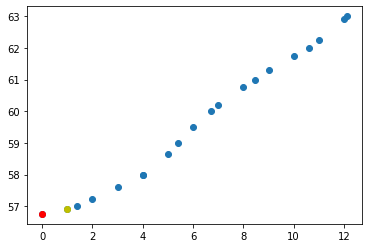

In [15]:
plt.scatter(cs2.allsegs[9][1][:, 0], cs2.allsegs[9][1][:, 1])
plt.scatter(cs2.allsegs[9][1][0, 0], cs2.allsegs[9][1][0, 1], c = 'r')
plt.scatter(cs2.allsegs[9][1][1, 0], cs2.allsegs[9][1][1, 1], c = 'y')

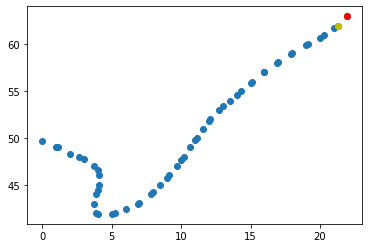

In [16]:
plt.scatter(cs2.allsegs[9][2][:, 0], cs2.allsegs[9][2][:, 1])
plt.scatter(cs2.allsegs[9][2][0, 0], cs2.allsegs[9][2][0, 1], c = 'r')
plt.scatter(cs2.allsegs[9][2][1, 0], cs2.allsegs[9][2][1, 1], c = 'y')

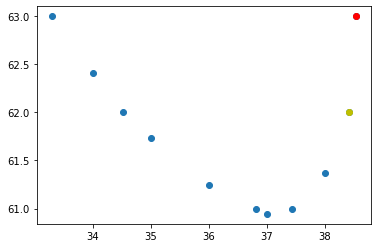

In [17]:
plt.scatter(cs2.allsegs[9][3][:, 0], cs2.allsegs[9][3][:, 1])
plt.scatter(cs2.allsegs[9][3][0, 0], cs2.allsegs[9][3][0, 1], c = 'r')
plt.scatter(cs2.allsegs[9][3][1, 0], cs2.allsegs[9][3][1, 1], c = 'y')

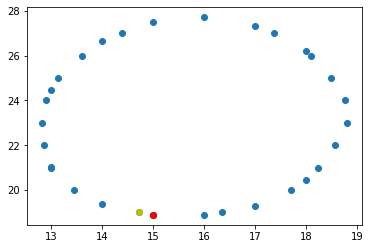

In [18]:
plt.scatter(cs2.allsegs[9][4][:, 0], cs2.allsegs[9][4][:, 1])
plt.scatter(cs2.allsegs[9][4][0, 0], cs2.allsegs[9][4][0, 1], c = 'r')
plt.scatter(cs2.allsegs[9][4][1, 0], cs2.allsegs[9][4][1, 1], c = 'y')

#### Next next batch

In [19]:
len(cs2.allsegs[10])

7

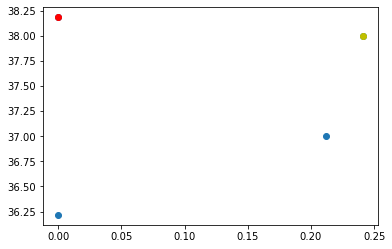

In [20]:
plt.scatter(cs2.allsegs[10][0][:, 0], cs2.allsegs[10][0][:, 1])
plt.scatter(cs2.allsegs[10][0][0, 0], cs2.allsegs[10][0][0, 1], c = 'r')
plt.scatter(cs2.allsegs[10][0][1, 0], cs2.allsegs[10][0][1, 1], c = 'y')

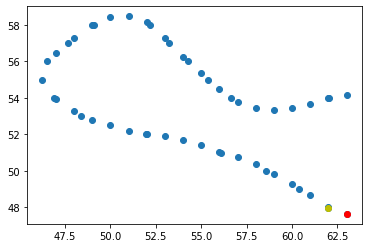

In [21]:
plt.scatter(cs2.allsegs[10][1][:, 0], cs2.allsegs[10][1][:, 1])
plt.scatter(cs2.allsegs[10][1][0, 0], cs2.allsegs[10][1][0, 1], c = 'r')
plt.scatter(cs2.allsegs[10][1][1, 0], cs2.allsegs[10][1][1, 1], c = 'y')

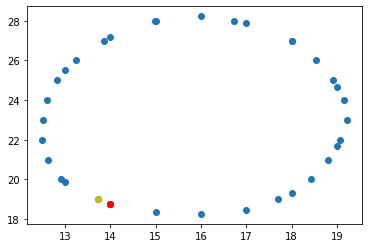

In [22]:
plt.scatter(cs2.allsegs[10][6][:, 0], cs2.allsegs[10][6][:, 1])
plt.scatter(cs2.allsegs[10][6][0, 0], cs2.allsegs[10][6][0, 1], c = 'r')
plt.scatter(cs2.allsegs[10][6][1, 0], cs2.allsegs[10][6][1, 1], c = 'y')

In [23]:
test = np.array( [[0, 0], [1, 1], [3, 9], [4,3]])

In [24]:
len(cs2.allsegs[1][0])

3

In [25]:
Contours = {}
count = 0

for i in range( len(cs2.levels) -2): 
    
    paths = cs2.collections[i + 1].get_paths()
    
    for j in range( len(paths)):
        
        array = paths[j].vertices
        
        if len(array) >= 4: 
            
            # create a dictionary
            count += 1
            Contours[count] = {}
        
            # continous points
            Contours[count]['array'] = array
        
            #curvature
            curvature = kurvature.curvature_splines(array[:, 0], array[:, 1])
            Contours[count]['curvature'] = curvature
        
            # determine when does the sign change
            asign = np.sign(curvature)
            signchange = ((np.roll(asign, 1) - asign != 0)).astype(int)
            signchange[0] = 0   
            indices = np.where(signchange == 1)[0]
            Contours[count]['indices'] = indices
        
            # create two nested dicts that contain the segments w/ positive and negative curvature
            number_of_segments = len(Contours[count]['indices']) + 1
            Contours[count]['positive'] = {}
            Contours[count]['negative'] = {}
        
            # no change in curvature sign in entire contour
            if number_of_segments ==1: 
            
                if curvature[0] > 0:     
                    Contours[count]['positive'][1] = array
                else: 
                    Contours[count]['negative'][1] = array
                
            
            # contour switches curvature sign   
            else: 
            
                idx0 = 0
                odd = 1
                even = 1
                for k in range(number_of_segments - 1):
                    idx1 = indices[k]
                
                    # depending on 1st segment, even or odd is (+) curvature and vice versa
                    # k%2 != 0 (odd) and k%2 == 0 (even)
                    if curvature[0] > 0 and (k+1)%2 != 0:
                        Contours[count]['positive'][odd] = array[idx0 : idx1]
                        odd += 1
                    if curvature[0] > 0 and (k+1)%2 == 0:
                        Contours[count]['negative'][even] = array[idx0 : idx1]
                        even += 1
                    if curvature[0] < 0 and (k+1)%2 == 0:
                        Contours[count]['positive'][even] = array[idx0 : idx1]
                        even += 1
                    if curvature[0] < 0 and (k+1)%2 != 0: 
                        Contours[count]['negative'][odd] = array[idx0 : idx1]
                        odd += 1
                        
                    idx0 = idx1
            
                    # last segment
                    if k == number_of_segments -2 and k >0:
                    
                        # assign the last segment
                        # determine if odd or even
                        if number_of_segments %2 == 0:
                            if curvature[0] > 0:
                                Contours[count]['negative'][even] = array[idx0:]
                            else: 
                                Contours[count]['positive'][even] = array[idx0:]
                        
                        else: 
                            if curvature[0] < 0:
                                Contours[count]['positive'][odd] = array[idx0:]
                            else: 
                                Contours[count]['negative'][odd] = array[idx0:]
            

# Plot (+) and (-) clusters

(0.0, 64.0)

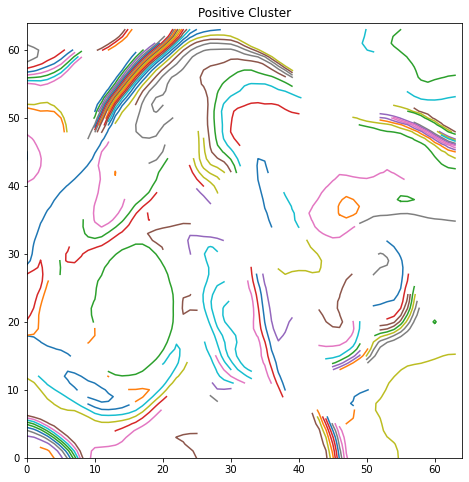

In [26]:
# plot (+) cluster
N = len(Contours)
n = np.arange(1, N +1 , 1)

fig5 = plt.figure( figsize = (8, 8))
ax5 = fig5.add_subplot(111)

for l in n:
    
    pos_segs = len(Contours[l]['positive'])

    for m in range( pos_segs ):
        ax5.plot(Contours[l]['positive'][m+1][:,0], Contours[l]['positive'][m+1][:,1], label='segment {}'.format(m + 1) )

#plt.legend(loc='upper left');
plt.title('Positive Cluster')
plt.axis('square')
plt.xlim(0, 64)
plt.ylim(0, 64)

(0.0, 64.0)

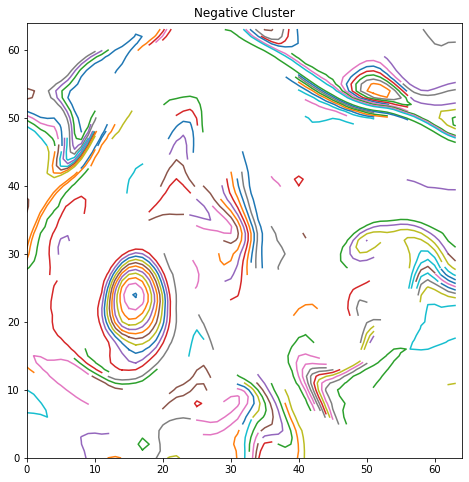

In [27]:
# plot (-) cluster
N = len(Contours)
n = np.arange(1, N +1 , 1)

fig5 = plt.figure( figsize = (8, 8))
ax5 = fig5.add_subplot(111)

for l in n:
    
    pos_segs = len(Contours[l]['negative'])

    for m in range( pos_segs ):
        ax5.plot(Contours[l]['negative'][m+1][:,0], Contours[l]['negative'][m+1][:,1], label='segment {}'.format(m + 1) )

#plt.legend(loc='upper left');
plt.title('Negative Cluster')
plt.axis('square')
plt.xlim(0, 64)
plt.ylim(0, 64)

In [28]:
Contours[2]['positive'][2]

array([[12.        , 60.0297056 ],
       [13.        , 60.62971236],
       [13.48323909, 61.        ],
       [14.        , 61.36225332],
       [14.70254887, 62.        ],
       [15.        , 62.45306091],
       [15.42317186, 63.        ]])

In [103]:
Contours[119]

{'array': array([[55.        , 37.73860906],
        [56.        , 37.73797071],
        [57.        , 37.99516213],
        [57.00971248, 38.        ],
        [57.        , 38.0046877 ],
        [56.        , 38.45731678],
        [55.        , 38.5613616 ],
        [54.51249741, 38.        ],
        [55.        , 37.73860906]]),
 'curvature': array([0.03168938, 0.15416562, 3.38516666, 2.34621562, 0.30092027,
        0.24527215, 0.62491197, 3.25464272, 0.93009959]),
 'indices': array([], dtype=int64),
 'positive': {1: array([[55.        , 37.73860906],
         [56.        , 37.73797071],
         [57.        , 37.99516213],
         [57.00971248, 38.        ],
         [57.        , 38.0046877 ],
         [56.        , 38.45731678],
         [55.        , 38.5613616 ],
         [54.51249741, 38.        ],
         [55.        , 37.73860906]])},
 'negative': {}}

# Divide image into overlapping segment regions

In [125]:
import convex_hulls as ch

In [144]:
ch.clouds_overlap( Contours[2]['negative'][2], Contours[3]['negative'][2])

True

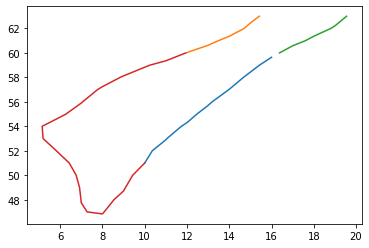

In [132]:
plt.plot( Contours[2]['positive'][1][:,0] , Contours[2]['positive'][1][:, 1])
plt.plot( Contours[2]['positive'][2][:, 0], Contours[2]['positive'][2][:, 1] )
plt.plot( Contours[2]['negative'][1][:,0] , Contours[2]['negative'][1][:, 1])
plt.plot( Contours[2]['negative'][2][:, 0], Contours[2]['negative'][2][:, 1] )

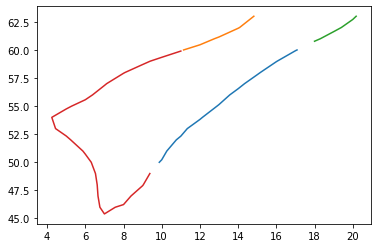

In [137]:
plt.plot( Contours[3]['positive'][1][:,0] , Contours[3]['positive'][1][:, 1])
plt.plot( Contours[3]['positive'][2][:, 0], Contours[3]['positive'][2][:, 1] )
plt.plot( Contours[3]['negative'][1][:,0] , Contours[3]['negative'][1][:, 1])
plt.plot( Contours[3]['negative'][2][:, 0], Contours[3]['negative'][2][:, 1] )

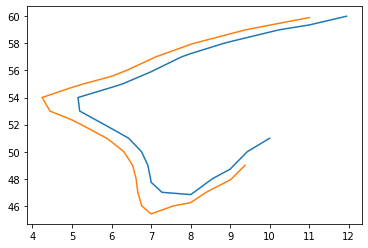

In [145]:
plt.plot( Contours[2]['negative'][2][:,0] , Contours[2]['negative'][2][:, 1])
plt.plot( Contours[3]['negative'][2][:, 0], Contours[3]['negative'][2][:, 1] )